# Lesson 1: The Poisson Distribution

<i>Lifted heavily from Data Analysis in High Energy Physics </i>
<p>
    The Poisson distribution is a probability denstity function (PDF) that describes the probability of <i>n</i> events occurring when the mean expected number is <i>v</i> - i.e., the outcome of a counting experiment:
    
\begin{align}
f(n, v) = \frac{v^n}{n!}  e^{-v}
\end{align}

 The number of events <i>n</i> is discrete, while the mean <i>v</i> is continuous. The standard deviation of the distribution $\sigma = \sqrt{v}$.
 
Recall that we define the standard deviation as the square root of the variance. The variance is more generically known as the central second moment, $E[(n-v)^2)]$ or $\langle(n-v)^2\rangle$. We can calculate this:

\begin{align}
\langle(n-v)^2\rangle &= \sum_{n=0}^{\infty} (n-v)^2 \frac{v^n}{n!}  e^{-v}\\
          &=  e^{-v} \sum_{n=0}^{\infty} \frac{v^{2}v^n - 2nv^{n+1} + n^2 v^n}{n!}\\
          &= v^2 + 0 +  e^{-v} \sum_{n=1}^{\infty}\biggl[ - \frac{2v^2v^{n-1}}{(n-1)!} +  \frac{n^2 v^n}{n!}\biggr])\\ 
          &=  v^2 + e^v (\sum_{m=n-1=0}^{\infty}\biggl[- \frac{2v^2v^m}{m!} +  \frac{(m+1)v v^m}{m!} \biggr])\\
          &=  - v^2 + v + e^v \sum_{k=m-1=0}^{\infty} \frac{v^2v^{m-1}}{(m-1)!}\\
          &=  - v^2 + v + v^2 \\
          &= v.
\end{align} 
 
 Before we input any assumptions, $f$ is just an equation of two variables $n$ and $v$. However, in practice, we are interested in one parameter (here, $n$), while the seciond ($v$) is a <i>generic parameter</i>. To make this distinction, we generally separate the quantities we care about, $x$, from the collection of generic parameters a function depends on, $\theta$, by either a bar $|$ or a semicolon ;.
 
 For example, for our Poisson distribution, we would write this as $f(n;v)$.
 
 Let's look at a few Poisson distributions for different means:

In [1]:
import ROOT
import numpy as np
from scipy.stats import poisson,norm

Welcome to JupyROOT 6.18/00


In [2]:
means =  [1,2,5,10,15,20]
colours = [ROOT.kRed+2,ROOT.kOrange-3, ROOT.kGreen+2,ROOT.kBlue-3,ROOT.kViolet-3,ROOT.kMagenta+2]
poisson_dists = [ROOT.TH1D("poisson_"+str(v),"poisson distributions",50,0,50) for v in means]

rnd = ROOT.TRandom(123)

n_toys = 10000

for col,v,pd in zip(colours,means,poisson_dists):
    i=0
    while i < n_toys:
        pd.Fill(rnd.Poisson(v))
        i+=1
    pd.Scale(1./pd.Integral())
    pd.SetLineColor(col)
    pd.SetLineWidth(3)
    pd.GetXaxis().SetTitle("Experimental outcome (Number of observed events)")
    pd.GetYaxis().SetTitle("Poisson probability of outcome")

We created the Poisson PDFs by a method colloquially called "throwing toys" or with a "toy experiment". We used 10,000 toys per Poisson distribution. What happens if we use fewer?

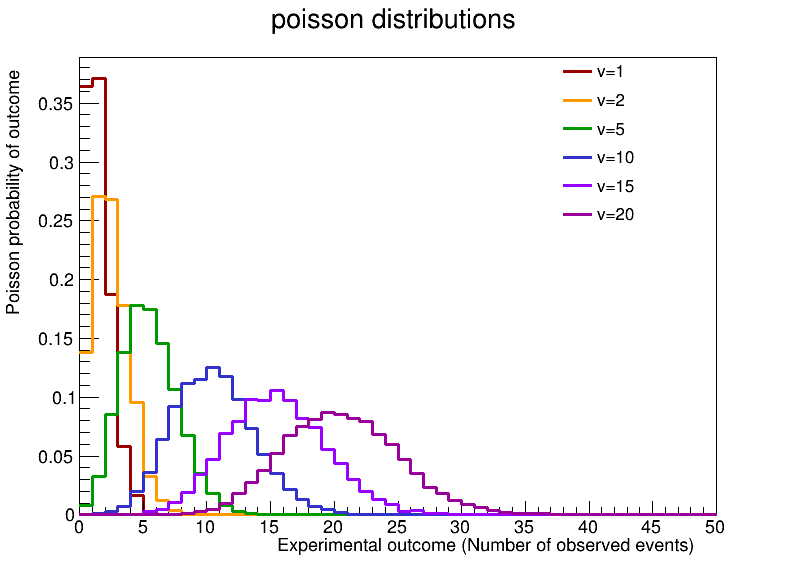

In [3]:
c1 = ROOT.TCanvas("c1","c1",800,600)
leg= ROOT.TLegend(0.7,0.6,0.9,0.9)
leg.SetBorderSize(0); leg.SetFillStyle(0)

ROOT.gStyle.SetOptStat(0)

for i,(v,pd) in enumerate(zip(means,poisson_dists)):
    if i==0: pd.Draw("hist")
    else: pd.Draw("hist same")
    leg.AddEntry(pd,"v="+str(v),"l")
leg.Draw()
c1.Draw()

Note that the distribution is very asymmetric at small N. However, at large N the Poisson distribution is ~ a Gaussian with standard deviation $\sqrt{n}$:

In [4]:
means =  [2,10,20]
colours = [ROOT.kOrange-3,ROOT.kBlue-3,ROOT.kMagenta+2]
gaussian_dists = [ROOT.TH1D("gaussian_"+str(v),"gaussian distributions",50,0,50) for v in means]

rnd = ROOT.TRandom(123)

n_toys = 10000

for col,v,pd in zip(colours,means,gaussian_dists):
    i=0
    while i < n_toys:
        pd.Fill(rnd.Gaus(v,np.sqrt(v)))
        i+=1
    pd.Scale(1./pd.Integral())
    pd.SetLineColor(col)
    pd.SetLineWidth(3)
    pd.SetLineStyle(7)
    pd.GetXaxis().SetTitle("Experimental outcome (Number of observed events)")
    pd.GetYaxis().SetTitle("Probability of outcome")

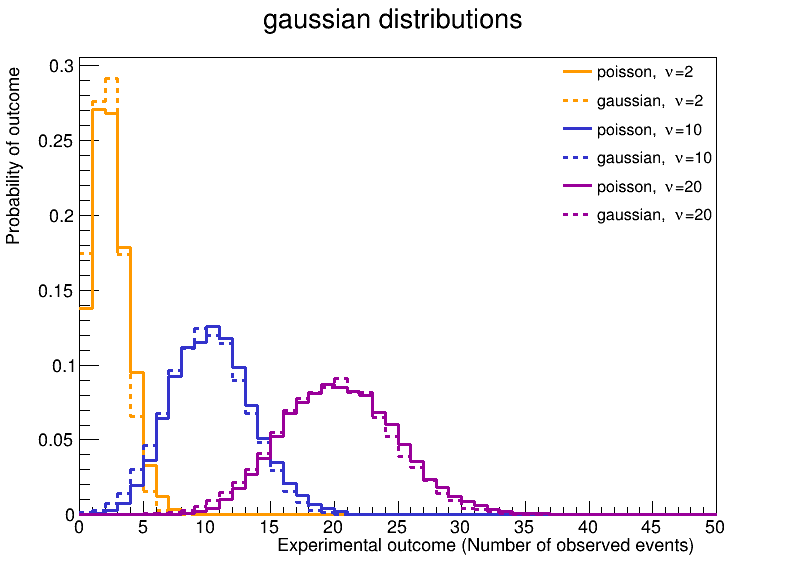

In [5]:
c1.cd()
leg.Clear()

pd_2 = [poisson_dists[1],poisson_dists[3],poisson_dists[5]]
for i,(v,pd,gaus) in enumerate(zip(means,pd_2,gaussian_dists)):
    if i==0: gaus.Draw("hist")
    else: gaus.Draw("hist same")
    pd.Draw("hist same")
    leg.AddEntry(pd,"poisson, #nu="+str(v),"l")
    leg.AddEntry(gaus,"gaussian, #nu="+str(v),"l")
leg.Draw()
c1.Draw()

Now let's step back a minute and think about what these distributions mean in the context of our analyses. If we calculate an expected number of events $N_{exp}$, then (providing our model is correct!) if we go measure the value in data, we would expect the probability of <i>observing</i> $N_{obs}$ events to be modelled by the Poisson distribution. 

If we expect 5 events, what is the chance of observing exactly 5?

In [6]:
#we could do this with the TH1 and toys we created above, but let's use another method.
#pmf(k, mu, loc=0); Probability mass function.

print 'Probability of observing exactly 5 given 5 expected:', poisson.pmf(5,5)
print 'Probability of observing exactly 0 given 5 expected:', poisson.pmf(0,5)

Probability of observing exactly 5 given 5 expected: 0.17546736976785068
Probability of observing exactly 0 given 5 expected: 0.006737946999085467


In HEP, this probability is more commonly referred to as the $likelihood$, deonted $L(N;v)$. This is purely a cosmetic difference - there is no change in the underlying meaning.

More specifically, we will usually see the likelihood expressed in terms of the observation and a hypothesis, such as $P($obseravation,hypothesis$) = L($observation|hypothesis$)$ (or data|hypothesis, data|theory, etc. - there are many ways to phrase this!)

Now imagine an experiment where our expected background is 5 and we observed 9 events. You could imagine this as the results of a cut-and-count experiment where we've neglected to include systematic uncertainties. 

We are interested in the probability to observe this, or any ‘similar’ result: e.g. the same signal event count, or larger. To introduce a precise, unambiguous notion, of what ‘more signal’ (or more generically, ‘more extreme’) means in the context of statistical inference, we use a *test statistic*.

A test statistic is, generically speaking, any function $T(x)$ of the observable data $x$. In our simple example, we have only a single bin with a number of events. The goal of a test statistic is that it orders all possible observations $x$ by extremity: $𝑇(𝑥)>𝑇(𝑥′)$ means that the observation $𝑥$ is more extreme than observation $𝑥′$. 

For example, for our Poisson counting experiment, the trivial choice $𝑇(𝑥)=𝑥$ defines a useful test statistic. It orders all possible observations by extremity, which in our counting experiment case corresponds to more observed events (*farther away from our background-only hypothesis*). 

With the notion of ordering possible outcomes by extremity comes the concept of $p$-values. A $p$-value is the probability to obtain the observed data, or more extreme, in future repeated experiments. 

For example, for the probability to observe 9 counts or more for a Poisson counting experiment with the background hypothesis of the previous example $v=5$ is:

\begin{align}
p(H_{B})=\sum_{n=9}^{\infty} \mbox{Poisson}(n;v=5)
\end{align}

A 𝑝-value is always <b>specific to the hypothesis under which it is evaluated</b>. When no specification is given, it usually refers the to null-hypothesis, which is for discovery-style analyses the background-only hypothesis - we have called this $H_{B}$.

What is the p-value for our experiment?

In [7]:
#for this, we can use the cumulative distribution function:
#cdf(k, mu, loc=0); Cumulative distribution function.
print 'Probability of observing >= 9 given 5 expected:', 1 - poisson.cdf(8,5)
#1 - probability of 8 = probability of >= 9

Probability of observing >= 9 given 5 expected: 0.06809363472184837


We can also express this as the <i>odds of a Gaussian fluctuation with equal p-value</i>: the significance, $Z_n$, or $z$-value. Mathematically, this can be expressed as:

\begin{align}
p-\mbox{value} = \int_{z-\mbox{value}}^{\infty} \frac{1}{\sqrt{2\pi}} e^{-x^2/2} dx,
\end{align}

where here, our Gaussian is expressed in the standardized form - with mean 0 and standard deviation 1. This means that we can integrate from a value of x directly equal to a multiple of the standard deviation.

In [8]:
#handy function to calculate this for us!
#ppf(q, loc=0, scale=1)	Percent point function (inverse of cdf — percentiles).

print 'Significance (z-value) of observing >= 9 given 5 expected:', norm.ppf(0.068)
#we do 1-p-value because the percentile function is defined from negative to positive, and thus includes 
#probability from 0 up to z-value. If we did 0.068, we would get the negative sigma value from the Gaussian
#distribution. Try it out!

Significance (z-value) of observing >= 9 given 5 expected: -1.490853355246661


1.5 sigma is not particularly significant!  But, in any case, let's now extend the study to different signal hypotheses.

In our experiment, we expect 5 background events and observed $N_{obs} = 9$.  Ultimately, we want to know the probability that we actually saw a signal - or, $L($signal hypothesis|observation$)$. However, calcuating this is non-trivial (and will be covered in a future lesson), so let's start with some simpler numbers. 

First, we can calculate $L(N_{obs} | H_{b})$ and $L(N_{obs} | H_{s+b})$, where $H_{b}$ and $H_{s+b}$ are our background-only and signal+background hypotheses, respectively. I haven't specified a set number for $s$, because this is generally a floating parameter that we set a limit on or measure the strength of (kind of like how we set a limit on the branching ratio, or cross section x branching ratio). 

Let's look at some distributions:

Likelihood of observing >= 9 given 5 background: 0.06809363472184837
 corresponding significance: 1.4901406054758806
Likelihood of observing >= 15 given 5 background: 0.00022625367617679082
 corresponding significance: 3.5074006121687327
Likelihood of observing >= 21 given 5 background: 8.109250460019979e-08
 corresponding significance: 5.238160478870921


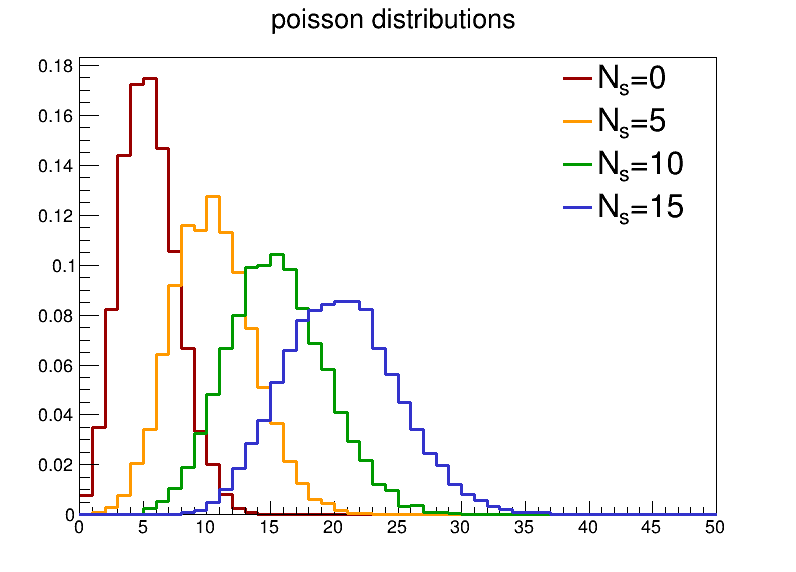

In [9]:
n_signals =  [0,5,10,15]
colours = [ROOT.kRed+2,ROOT.kOrange-3, ROOT.kGreen+2,ROOT.kBlue-3,ROOT.kViolet-3,ROOT.kMagenta+2]
poisson_dists = [ROOT.TH1D("sig="+str(v),"poisson distributions",50,0,50) for v in n_signals]

rnd = ROOT.TRandom(123)

n_toys = 10000

for col,v,pd in zip(colours,n_signals,poisson_dists):
    i=0
    while i < n_toys:
        pd.Fill(rnd.Poisson(v+5))
        i+=1
    pd.Scale(1./pd.Integral())
    pd.SetLineColor(col)
    pd.SetLineWidth(3)

leg.Clear()

for i,(v,pd) in enumerate(zip(n_signals,poisson_dists)):
    if i==0: pd.Draw("hist")
    else: pd.Draw("hist same")
    leg.AddEntry(pd,"N_{s}="+str(v),"l")
leg.Draw()
c1.Draw()

print 'Likelihood of observing >= 9 given 5 background:',1-poisson.cdf(8,5)
print ' corresponding significance:',norm.ppf(poisson.cdf(8,5))

print 'Likelihood of observing >= 15 given 5 background:',1-poisson.cdf(14,5)
print ' corresponding significance:',norm.ppf(poisson.cdf(14,5))

print 'Likelihood of observing >= 21 given 5 background:',1-poisson.cdf(20,5)
print ' corresponding significance:',norm.ppf(poisson.cdf(20,5))

So in order to claim we're 5 sigma away from the background hypothesis we would have needed to observe at least 21 events!

Back to our $N_{obs} = 9$ events, we can also turn around the question and ask whether or not we can <i>exclude</i> our signal hypothesis - or, what signal hypothesis can we exclude at 95% confidence level?

In [11]:
print 'Likelihood of observing < 9 events given 5 background + 5 signal:',poisson.cdf(8,5+5)
print ' corresponding significance:',-1.*norm.ppf(poisson.cdf(8,5+5))

print 'Likelihood of observing < 9 events given 5 background + 10 signal:',poisson.cdf(8,5+10)
print ' corresponding significance:',-1.*norm.ppf(poisson.cdf(8,5+10))

Likelihood of observing < 9 events given 5 background + 5 signal: 0.3328196787507191
 corresponding significance: 0.4321404219881563
Likelihood of observing < 9 events given 5 background + 10 signal: 0.037446493479672875
 corresponding significance: 1.7811191559648658


In [12]:
#95% CL corresponds to a p-value of 0.05...
#The answer lies somewhere between 5 and 10!
min_value = [8,poisson.cdf(8,5+10)]
for i in range(0,5000):
    test_val = 5. + i*(10.-5.)/5000.
    cdf = poisson.cdf(8,5+test_val)
    if np.abs(cdf - 0.05) < np.abs(min_value[1] - 0.05):
        min_value  = [test_val, cdf]
    
print 'Number of signal events we can exclude at 95% CL is:',min_value[0]

Number of signal events we can exclude at 95% CL is: 9.435


Another question we often ask, in background-free searches, is if we observe zero limits, how many signal events can we exclue at 95% CL? 

It doesn't make sense to calculate the likelihood of observing < 0 events - so The probability of zero events given a mean of $v$ is $P(0; v) = e^{-v}$. We want to know when the probability of this happening is < 0.05. 

This is something we can calculate analytically:

\begin{align}
0.05 =& e^{-v}\\
-ln(0.05) =& v\\
& v = 2.996
\end{align}

And thus we can exclude a signal hypothesis of 3 events at 95% CL.

You'll probably come across someone saying "if you expect zero events, the limit is three." Now you can prove it!

## exercise:  calculate the significance of the "result" presented in this talk:
https://indico.cern.ch/event/769729/contributions/3510939/attachments/1904988/3145907/KAON2019_shinohara_upload.pdf

In [4]:
print 'Likelihood of observing >= 4 given 0.05 background:',1-poisson.cdf(3,0.05)
print ' corresponding significance:',norm.ppf(poisson.cdf(3,0.05))

Likelihood of observing >= 4 given 0.05 background: 2.502139473392617e-07
 corresponding significance: 5.026148706558757
